In [2]:
# The code was removed by DSX for sharing.

,Customer,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Town
0,QZ44356,6979,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131,Four-Door Car,Medsize,New York
1,WW63253,7645,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529,SUV,Medsize,San Francisco
2,SX51350,4738,No,Basic,College,2/21/2011,Unemployed,M,0,Suburban,...,0,3,Personal Auto,Personal L3,Offer1,Agent,482,Four-Door Car,Small,San Francisco
3,VQ65197,8197,No,Basic,College,1/6/2011,Unemployed,F,0,Suburban,...,0,3,Personal Auto,Personal L3,Offer2,Agent,528,SUV,Medsize,San Francisco
4,TZ98966,2450,No,Basic,Bachelor,2/24/2011,Unemployed,F,0,Suburban,...,3,1,Corporate Auto,Corporate L3,Offer1,Branch,554,Four-Door Car,Medsize,New York


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
Customer Lifetime Value          9134 non-null int64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Open Complaints                  9134 non-null int64
Number of Policies               9134 non-null int64
Policy Type                      913


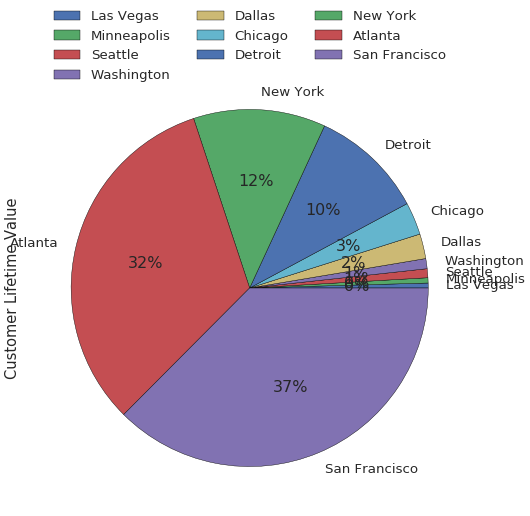

In [4]:
# !pip install --user --upgrade pixiedust
import pixiedust
display(df)

In [5]:
renewals = df[df ['Response'] == "Yes"  ]
renewals = renewals [ ['Customer Lifetime Value', 'Number of Policies', 'Renew Offer Type','Coverage','Education','EmploymentStatus','Gender','Income','Marital Status','Monthly Premium Auto','Sales Channel','Vehicle Size','Months Since Policy Inception','Location Code','Open Complaints']]
renewals.tail()

,Customer Lifetime Value,Number of Policies,Renew Offer Type,Coverage,Education,EmploymentStatus,Gender,Income,Marital Status,Monthly Premium Auto,Sales Channel,Vehicle Size,Months Since Policy Inception,Location Code,Open Complaints
9123,8819,8,Offer2,Basic,High School or Below,Employed,M,99845,Married,110,Branch,Medsize,25,Suburban,1
9124,8819,8,Offer2,Basic,High School or Below,Employed,M,99845,Married,110,Branch,Medsize,25,Suburban,1
9125,8819,8,Offer2,Basic,High School or Below,Employed,M,99845,Married,110,Branch,Medsize,25,Suburban,1
9126,8819,8,Offer2,Basic,High School or Below,Employed,M,99845,Married,110,Branch,Medsize,25,Suburban,1
9127,8819,8,Offer2,Basic,High School or Below,Employed,M,99845,Married,110,Branch,Medsize,25,Suburban,1


In [6]:
# print (renewals)
offerscore = [] 
for customer in renewals['Renew Offer Type']:
#for customer in renewals :
    # print (customer)
    if (customer == "Offer1"): 
        score=3
    elif (customer == "Offer2"): 
        score=2
    else :
        score=1
    offerscore.append(score)
#print (offerscore)
    #print renewals
renewals ['Offers Score']= offerscore
renewals.head()

,Customer Lifetime Value,Number of Policies,Renew Offer Type,Coverage,Education,EmploymentStatus,Gender,Income,Marital Status,Monthly Premium Auto,Sales Channel,Vehicle Size,Months Since Policy Inception,Location Code,Open Complaints,Offers Score
14,6846,5,Offer1,Extended,Bachelor,Unemployed,F,0,Divorced,95,Call Center,Large,20,Suburban,0,3
18,8002,3,Offer1,Basic,College,Unemployed,F,0,Married,107,Agent,Medsize,65,Suburban,0,3
19,2393,1,Offer1,Basic,College,Unemployed,M,0,Single,70,Branch,Medsize,10,Suburban,0,3
30,3731,1,Offer1,Extended,High School or Below,Unemployed,F,0,Married,96,Agent,Large,34,Suburban,0,3
32,3885,1,Offer1,Premium,College,Unemployed,M,0,Married,105,Branch,Large,92,Suburban,0,3


In [7]:
#!pip install --user seaborn
# !pip install --user matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1)
# numeric = renewals.dtypes[df.dtypes!='object'].index # qulckly filter columns by numeric / non-numeric
#df_num = renewals[numeric[:16]]                      # and exclude all the genre binary columns
df_num = renewals[-1000:]




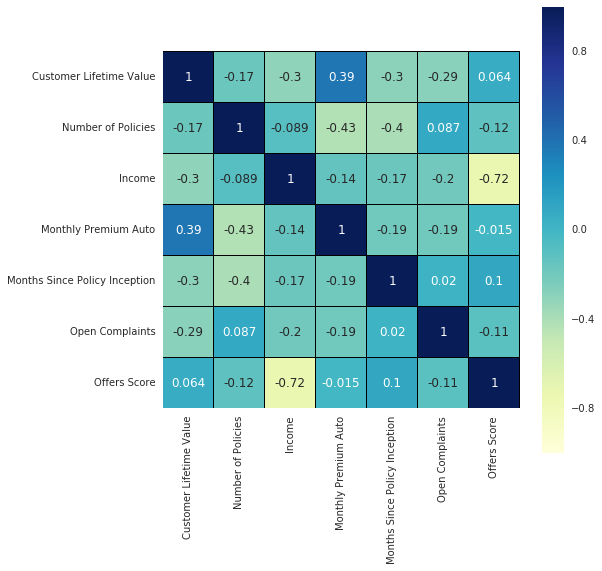

In [8]:
# create a correlation matrix
corr_mat=df_num.corr(method='pearson')
plt.figure(figsize=(8,8))

sns.heatmap(corr_mat.corr(),linewidths=0.25,vmax=1.0,\
            square=True, cmap="YlGnBu", linecolor='black', annot=True)
plt.show()


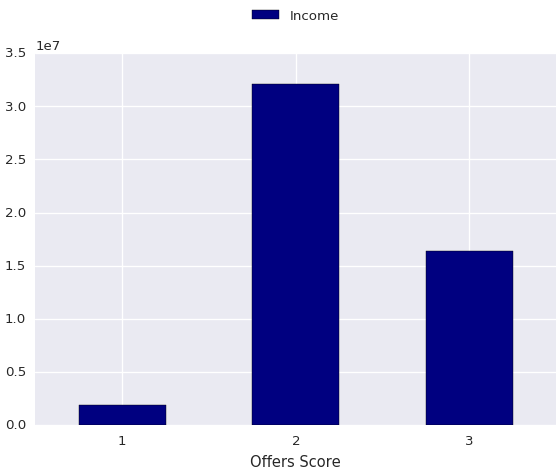

In [9]:
display(renewals)


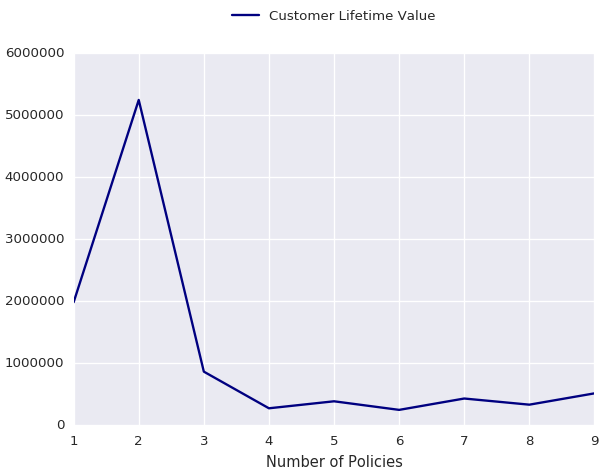

In [10]:
display(renewals)

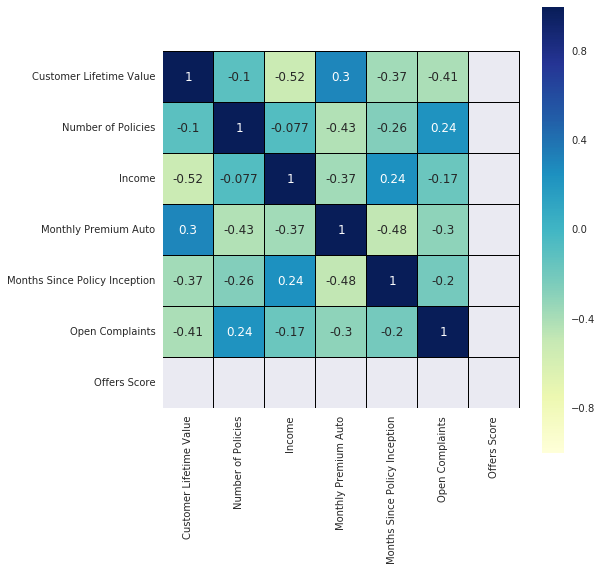

In [11]:
offers2 = renewals[renewals ['Renew Offer Type'] == "Offer2"  ]
# create a correlation matrix
corr_mat=offers2.corr(method='pearson')
plt.figure(figsize=(8,8))

sns.heatmap(corr_mat.corr(),linewidths=0.25,vmax=1.0,\
            square=True, cmap="YlGnBu", linecolor='black', annot=True)
plt.show()


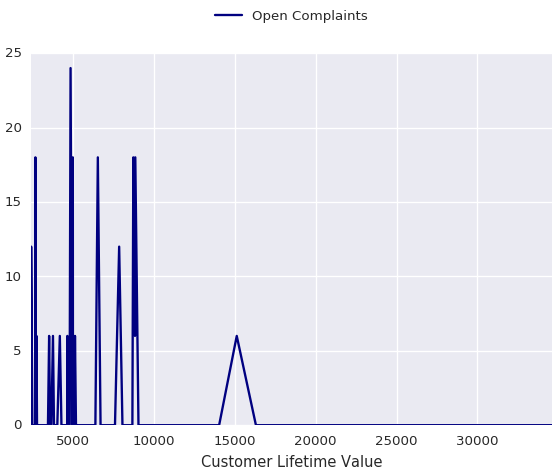

In [12]:
display(offers2)


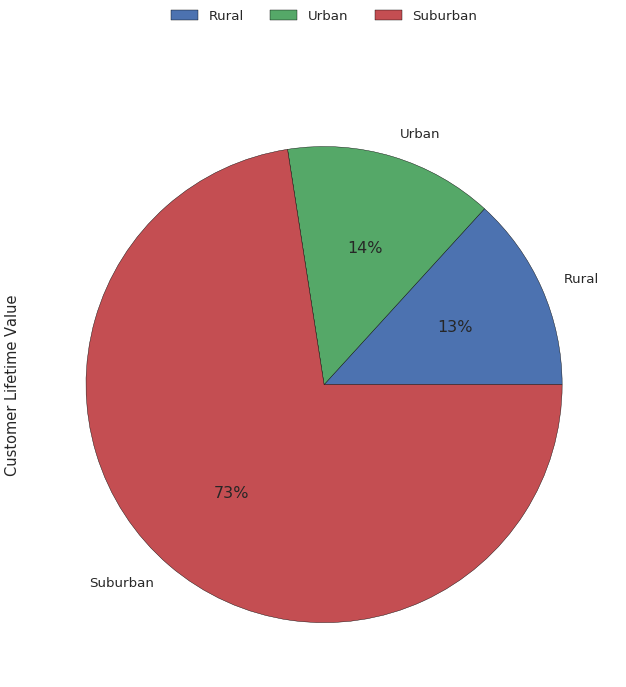

In [13]:
display(offers2)